# **AMAZON FINE FOOD REVIEWS ANALYSIS**

This Jupyter Notebook comprises analysis Dataset which comprises of more than 500000+ food reviews on Amazon.


Attribute Information:

1)Id

2)ProductId - unique identifier for the product

3)UserId - unqiue identifier for the user

4)ProfileName

5)HelpfulnessNumerator - number of users who found the review helpful

6)HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not

7)Score - rating between 1 and 5

8)Time - timestamp for the review

9)Summary - brief summary of the review

10)Text - text of the review



In [1]:
#importing Libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, roc_auc_score

In [2]:
#Loading Data
data = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')

In [3]:
#First Five Rows of the Data
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**DATA EXPLORATION**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
#Total Number of Reviewers

len(data['UserId'].unique())

256059

In [7]:
count_product_id = data["ProductId"].value_counts().index
count_product_id

Index(['B007JFMH8M', 'B0026RQTGE', 'B002QWHJOU', 'B002QWP89S', 'B002QWP8H0',
       'B003B3OOPA', 'B001EO5Q64', 'B000VK8AVK', 'B0026KNQSA', 'B007M83302',
       ...
       'B00406DG24', 'B001M0ALO2', 'B003TW1OJ2', 'B0058FN5CM', 'B0047435DO',
       'B004DSPTTM', 'B008C9QWU8', 'B007O5A6BM', 'B003Q4TZ08', 'B001LR2CU2'],
      dtype='object', length=74258)

In [8]:
data['Helpful %'] = np.where(data['HelpfulnessDenominator'] > 0, data['HelpfulnessNumerator'] / data['HelpfulnessDenominator'], -1)
data['% Upvote'] = pd.cut(data['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)

In [9]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,% Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty


Text(0.5, 1.0, 'How helpful users find among user scores')

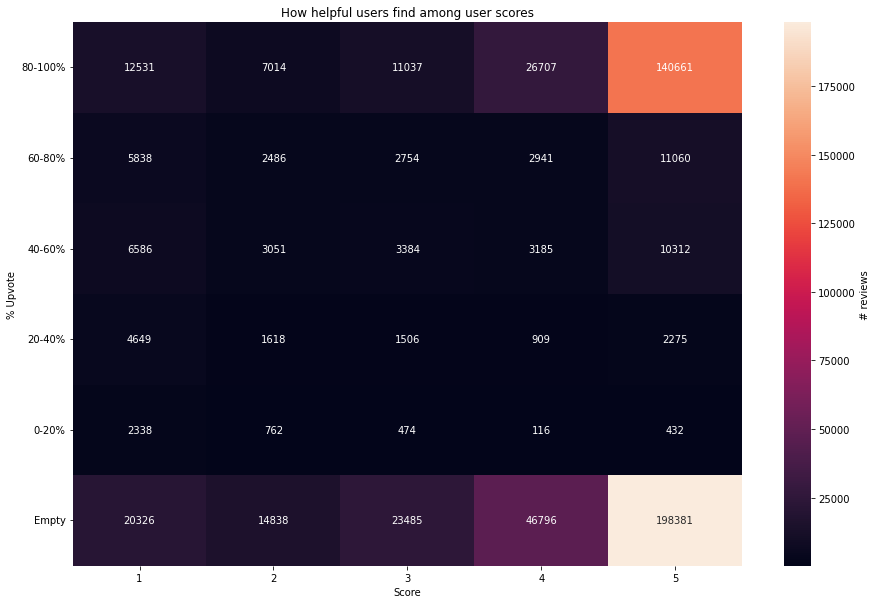

In [10]:
df = data.groupby(['Score', '% Upvote']).agg({'Id': 'count'})
df = df.unstack()
df.columns = df.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df[df.columns[::-1]].T, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')

**User Rating Distribution**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Score', ylabel='count'>

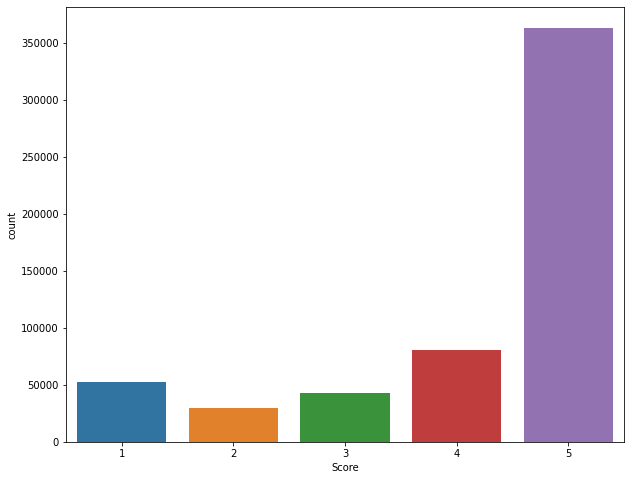

In [11]:
plt.figure(figsize = (10, 8))
sns.countplot(data['Score'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Score', ylabel='Density'>

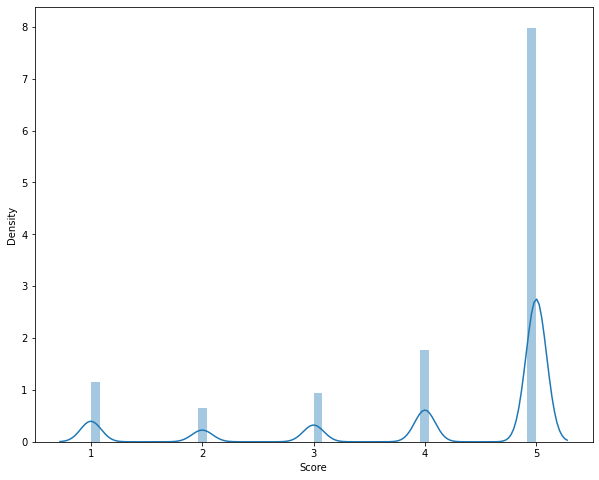

In [12]:
plt.figure(figsize = (10, 8))
sns.distplot(data['Score'])

In [13]:
data.Text[:10]

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
6    This saltwater taffy had great flavors and was...
7    This taffy is so good.  It is very soft and ch...
8    Right now I'm mostly just sprouting this so my...
9    This is a very healthy dog food. Good for thei...
Name: Text, dtype: object

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
first_20_text = data.Text[:20]
for test in first_20_text:
    test
    ss = analyser.polarity_scores(test)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(test)

compound: 0.9441, 
neg: 0.0, 
neu: 0.695, 
pos: 0.305, 
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
compound: -0.5664, 
neg: 0.138, 
neu: 0.862, 
pos: 0.0, 
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
compound: 0.8265, 
neg: 0.091, 
neu: 0.754, 
pos: 0.155, 
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis'

In [15]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,% Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty


In [16]:
df =  data
X = df['Text']
y_dict = {1:0, 2:0, 3:1, 4:0, 5:0}
y = df['Score'].map(y_dict)

In [17]:
df_user = data.groupby(['UserId']).agg({'Score':['count', 'mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Rating count', 'Rating mean']
df_user = df_user.sort_values(by = 'Rating count', ascending = False)
print(df_user.head(10))

                Rating count  Rating mean
UserId                                   
A3OXHLG6DIBRW8           448     4.535714
A1YUL9PCJR3JTY           421     4.494062
AY12DBB0U420B            389     4.647815
A281NPSIMI1C2R           365     4.841096
A1Z54EM24Y40LL           256     4.453125
A1TMAVN4CEM8U8           204     4.833333
A2MUGFV2TDQ47K           201     3.751244
A3TVZM3ZIXG8YW           199     1.000000
A3PJZ8TU8FDQ1K           178     4.601124
AQQLWCMRNDFGI            176     3.954545


In [18]:
data1 = data
data1["is_bad_review"] = data1["Score"].apply(lambda x: 1 if x < 4 else 0)
data1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,% Upvote,is_bad_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%,0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%,0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty,0


In [19]:
data1["is_bad_review"].value_counts(normalize = True)

0    0.780674
1    0.219326
Name: is_bad_review, dtype: float64

In [20]:
#Counting No of words per review
data1["words"] = data1["Text"].apply(lambda x: len(x.split(" ")))

In [21]:
data1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,% Upvote,is_bad_review,words
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%,0,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty,1,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%,0,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%,1,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty,0,30


**Analyzing Sentiment of reviews**

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

Intensity = SentimentIntensityAnalyzer()

In [23]:
res = {}
for i, row in tqdm(data1.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = Intensity.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [24]:
sentiment = pd.DataFrame(res).T
sentiment = sentiment.reset_index().rename(columns={'index': 'Id'})
data1 = data1.merge(sentiment, how='right')

In [25]:
data1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,% Upvote,is_bad_review,words,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%,0,49,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty,1,31,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%,0,99,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%,1,43,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty,0,30,0.000,0.552,0.448,0.9468


**SCORE PREDICTION**

In [26]:
X = data1[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'is_bad_review', 'Helpful %', 'words', 'pos', 'neg', 'compound', 'neu']]
y = data1['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [27]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
features = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'is_bad_review', 'Helpful %', 'words', 'pos', 'neg', 'compound', 'neu']

feature_importances = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances.head(20)

,feature,importance
2,is_bad_review,0.290941
7,compound,0.189115
4,words,0.135109
5,pos,0.119904
8,neu,0.113263
6,neg,0.088362
1,HelpfulnessDenominator,0.025779
3,Helpful %,0.021319
0,HelpfulnessNumerator,0.016207


In [28]:
prediction = rf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test, prediction))

Accuracy Score: 0.8319479994018876


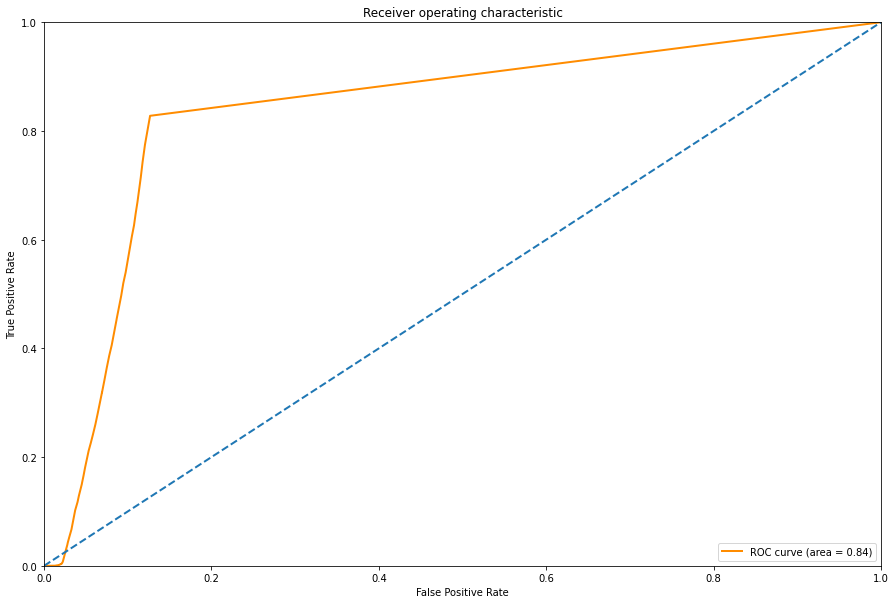

In [30]:

from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [31]:
print('Classification Report:')
CR = classification_report(y_test,prediction)
print(CR)

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.79      0.73     10326
           2       0.66      0.47      0.55      5855
           3       0.68      0.69      0.69      8485
           4       0.78      0.42      0.55     16123
           5       0.88      0.97      0.93     72902

    accuracy                           0.83    113691
   macro avg       0.74      0.67      0.69    113691
weighted avg       0.82      0.83      0.82    113691

